# Importing Libraries

In [2]:
# to ignore all the unnecessary warnings
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [1]:
import cv2
#from coffeeshop.coffeeshop import Coffeeshop
from tensordash.tensordash import Tensordash
import matplotlib.pyplot as plt
import numpy as np
import glob
import frame_enhancer as fe
import keras
from keras.models import Sequential,Model
from keras.optimizers import Adam
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard
import time

Using TensorFlow backend.


# Importing Enhanced Data

In [3]:
x=list()
y=list()
for i in range(1,1101):
    img=cv2.imread("Fire 1/%d.jpg"%i,1)
    img=cv2.resize(img,(50,50))
    img=np.float32(img)
    img/=255.0
    img = img.reshape(50, 50, 3)
    img=img.tolist()
    x.append(img)
    y.append(1)
for i in range(1,1101):
    img=cv2.imread("No Fire 1/%d.jpg"%i,1)
    img=cv2.resize(img,(50,50))
    img=np.float32(img)
    img/=255.0
    img = img.reshape(50, 50, 3)
    img=img.tolist()
    x.append(img)
    y.append(0)
x=np.asarray(x)
y=np.asarray(y)
y=to_categorical(y)

# Importing validation Data

In [4]:
firel=glob.glob('val/fire/*.jpg')
nfirel=glob.glob('val/no fire/*.jpg')
xval=list()
yval=list()
for i in firel:
    img=cv2.imread(i,1)
    img=cv2.resize(img,(50,50))
    img=np.float32(fe.enhance(img))
    img/=255.0
    img = img.reshape(50, 50, 3)
    img=img.tolist()
    xval.append(img)
    yval.append(1)
for i in nfirel:
    img=cv2.imread(i,1)
    img=cv2.resize(img,(50,50))
    img=np.float32(fe.enhance(img))
    img/=255.0
    img = img.reshape(50, 50, 3)
    img=img.tolist()
    xval.append(img)
    yval.append(0)
xval=np.asarray(xval)
yval=np.asarray(yval)
yval=to_categorical(yval)

# Neural Network

In [10]:
def NN():
    model = Sequential()
    model.add(Conv2D(16, (3,3),input_shape=(50,50,3),padding='same', activation='sigmoid'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(8, (3, 3), activation = 'sigmoid',padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation = 'sigmoid'))
    model.add(Dense(64, activation = 'sigmoid'))
    model.add(Dense(2, activation = 'softmax'))
    model.compile(Adam(lr = 0.001), loss = 'mse', metrics = ['accuracy'])
    return model

In [18]:
model=NN()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               147584    
_________________________________________________________________
dense_11 (Dense)             (None, 64)               

In [19]:
tensorboard = TensorBoard(log_dir = "logs/{}".format(time.time()))
tensorboard.set_model(model)

In [20]:
histories=model.fit(x,y,epochs=6,batch_size=5,verbose=1,shuffle=True,validation_data=(xval,yval), callbacks=[tensorboard])

Train on 2200 samples, validate on 1759 samples
Epoch 1/6
2200/2200 [==============================] - 9s 4ms/step - loss: 0.2438 - accuracy: 0.5577 - val_loss: 0.2073 - val_accuracy: 0.7766
Epoch 2/6
2200/2200 [==============================] - 9s 4ms/step - loss: 0.1792 - accuracy: 0.7441 - val_loss: 0.0823 - val_accuracy: 0.9642
Epoch 3/6
2200/2200 [==============================] - 9s 4ms/step - loss: 0.1514 - accuracy: 0.7900 - val_loss: 0.0703 - val_accuracy: 0.9153
Epoch 4/6
2200/2200 [==============================] - 8s 4ms/step - loss: 0.1457 - accuracy: 0.7950 - val_loss: 0.0424 - val_accuracy: 0.9704
Epoch 5/6
2200/2200 [==============================] - 9s 4ms/step - loss: 0.1395 - accuracy: 0.8100 - val_loss: 0.0538 - val_accuracy: 0.9437
Epoch 6/6
2200/2200 [==============================] - 9s 4ms/step - loss: 0.1359 - accuracy: 0.8145 - val_loss: 0.0293 - val_accuracy: 0.9875


In [22]:
model.save('val96p.h5')

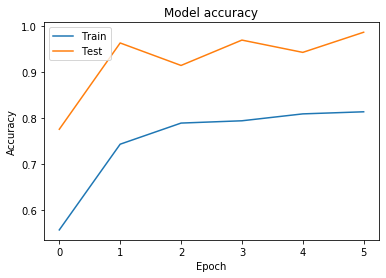

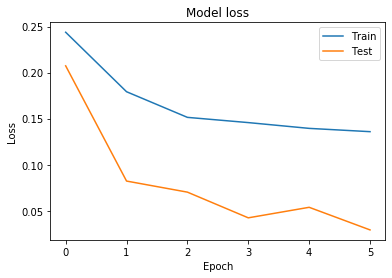

In [23]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(histories.history['accuracy'])
plt.plot(histories.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('resources/enhanced_accuracy.png', dpi=300)
plt.show()

# Plot training & validation loss values
plt.plot(histories.history['loss'])
plt.plot(histories.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.savefig('resources/enhanced_loss.png', dpi=300)
plt.show()

In [41]:
yval

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)